In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [388]:
class HebianNet():
    def __init__(self):
        self.weights = None
        self.trained = False
        
    def train(self,data):
        ### Borde normera vikterna för att inte energin ska bli fuckad
        if not self.trained:
            self.weights = np.zeros((data.shape[1], data.shape[1]))
        for index in range(data.shape[0]):
            self.weights = np.add(np.outer(np.transpose(data[index,:]),data[index,:]),self.weights)
        self.trained = True
    
    def update(self, x):
        new = np.dot(x,self.weights)
        new[new>=0] = 1
        new[new<0] = -1
        return new
    
    def converge_asynchronous(self, x):
        ###Tvek om den beter sig som den ska###
        dimension = np.shape(x)[0]
        iteration = 0
        error = 1000
        while error > 0:
            old_x = x.copy()
            i = np.random.randint(0,dimension)
            
            for j in range(dimension):
                sum_ = 0
                sum_ += np.multiply(self.weights[i][j], x[j])
                
            if sum_ < 0:
                x[i] = -1
            else:
                x[i] = 1
                
            error = np.sum(abs(x - old_x))
            iteration += 1
            
        return x, iteration
    
    def converge(self, x):
        error = 1
        itercount = 0
        while error > 0:
            new = self.update(x)
            error = sum(abs(new-x))
            x = new.copy()
            itercount += 1
            #if (itercount%100) == 0:
                #self.plot()
        return x, itercount
    
    def energy(self, pattern):
        outer = np.outer(pattern, np.transpose(pattern))
        pos_energy = np.sum(np.multiply(self.weights, outer))
        return np.multiply(-1, pos_energy)
    
    def plot(self, pattern):
        plt.imshow(pattern.reshape(32,32),interpolation="nearest")
        plt.show()
        
        

### Hopfield network recall

In [295]:
x1 = np.array([-1,-1,1,-1,1,-1,-1,1])
x2 = np.array([-1,-1,-1,-1,-1,1,-1,-1])
x3 = np.array([-1,1,1,-1,-1,1,-1,1])
data  = np.array([x1,x2,x3])

In [296]:
hn = HebianNet()

In [297]:
hn.train(data)

Reproduces learned patterns

In [298]:
hn.update(x1)-x1

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

### Convergence and attractors

In [299]:
x1d = np.array([1,-1,1,-1,1,-1,-1,1])
x2d = np.array([1,1,-1,-1,-1,1,-1,-1])
x3d = np.array([1,1,1,-1,1,1,-1,1])

In [300]:
hn.converge(x1d)[0]- x1

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

hn.converge(x2d)[0] - x2

In [301]:
hn.converge(x3d)[0] - x3

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Only x1d and x3d converge towards their respective undistorted patterns. x2d does not.

In [302]:
searchgrid = np.ones((256,8))

In [303]:
searchgrid

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

#### More than half wrong

In [304]:
x1dd = np.multiply(x1,np.array([-1,-1,-1,-1,-1,1,1,1]))

In [305]:
new, iterations = hn.converge(x1dd)
new = np.multiply(new,x1).copy()
result = len(new[new<0])
print("Diff from original vector in {} elements. Number of iterations to convergance was {}".format(result,iterations))

Diff from original vector in 4 elements. Number of iterations to convergance was 3


In [306]:
hn.converge(x1dd)

(array([ 1.,  1.,  1.,  1.,  1., -1.,  1.,  1.]), 3)

In [307]:
x1

array([-1, -1,  1, -1,  1, -1, -1,  1])

In [308]:
"CHECK 1 2 3"

'CHECK 1 2 3'

## Picture Data

### Sequential Update

In [337]:
pictData = np.loadtxt('./pict.dat',delimiter=",", dtype=int).reshape(-1,1024)

In [338]:
trainingData = pictData[0:3].copy()

In [339]:
testData = pictData[3:].copy()

In [372]:
hn = HebianNet()

In [373]:
hn.train(trainingData)

#### Check stability of training patterns

In [342]:
test1 = np.multiply(hn.update(trainingData[0]),trainingData[0])
print(len(test1[test1<0]))

0


In [343]:
test2 = np.multiply(hn.update(trainingData[1]),trainingData[1])
print(len(test1[test1<0]))

0


In [344]:
test3 = np.multiply(hn.update(trainingData[2]),trainingData[2])
print(len(test1[test1<0]))

0


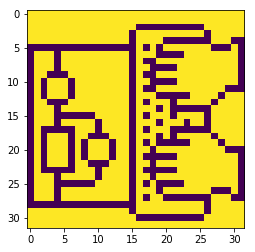

In [345]:
hn.plot(testData[5])

#### Check performance on degraded patterns

In [362]:
test1 = hn.converge(testData[-1])[0]
test2 = np.multiply(test1,trainingData[2])
print(len(test2[test2<0]))
### p11 (a combination of p2 and p3) comes closest to p3 

121


In [361]:
test3 = hn.converge(testData[-2])[0]
test4 = np.multiply(test3,trainingData[0])
print(len(test4[test4<0]))
### p10 (a degraded version of p1) converges to p1

0


0
240
(1024,)


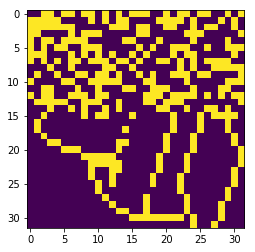

In [387]:
test3, iter_ = hn.converge_asynchronous(testData[-2])
test4 = np.multiply(test3,trainingData[0])
print(len(test4[test4<0]))
print(np.shape(test4))
hn.plot(test3)

#### Asynchronous update

In [ ]:
#stuff

### Hopfield network memes for the energy deficient teen

#### Energy at attractors

In [354]:
hn.energy(trainingData[0])

-1473936.0

#### Energy at distorted patterns

In [355]:
hn.energy(testData[0])

-737772.0

### Noise Resistance

### Capacity

### Sparse Patterns